<a href="https://colab.research.google.com/github/tanmay1070/Classification-of-Images-using-CNN/blob/main/Imageclassifier%2B_Deployment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gradio

     |████████████████████████████████| 1.1MB 5.9MB/s 
     |████████████████████████████████| 215kB 16.2MB/s 
     |████████████████████████████████| 71kB 4.1MB/s 
     |████████████████████████████████| 3.2MB 16.6MB/s 
     |████████████████████████████████| 962kB 44.1MB/s 
  Created wheel for Flask-BasicAuth: filename=Flask_BasicAuth-0.2.0-cp37-none-any.whl size=4232 sha256=36cf1e5ad2112234bbca851d9a952321d3a47689629be9e949053d860292fe44
  Stored in directory: /root/.cache/pip/wheels/8a/d5/8c/1f40bffc038e6ab2865836cc303e312e16de7b6b577be16b25
  Created wheel for flask-cachebuster: filename=Flask_CacheBuster-1.0.0-cp37-none-any.whl size=3372 sha256=73d3dedc4f7b0efdc20eb5372f2d67e2817e8a27735a9b788a13b274882a8458
  Stored in directory: /root/.cache/pip/wheels/9f/fc/a7/ab5712c3ace9a8f97276465cc2937316ab8063c1fea488ea77
  Created wheel for ffmpy: filename=ffmpy-0.3.0-cp37-none-any.whl size=4710 sha256=1275087c3529e3d1c2595dd358d8d276ae9eb90f62bb6a2cd294218e3d37f16d
  Stored in directory

In [ ]:

import tensorflow as tf
import keras
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import tensorflow.keras.backend as K

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


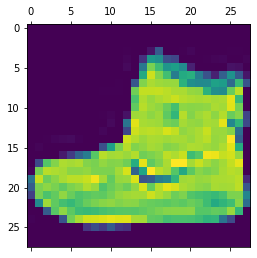

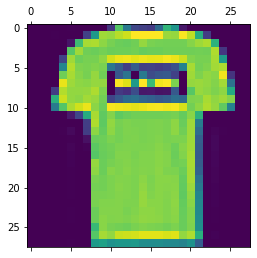

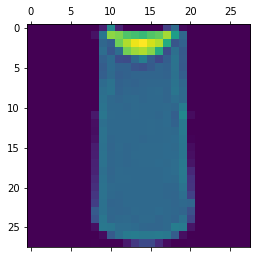

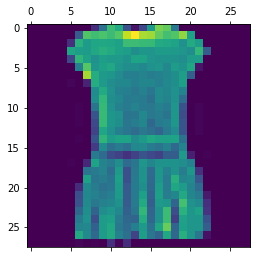

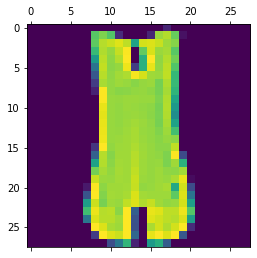

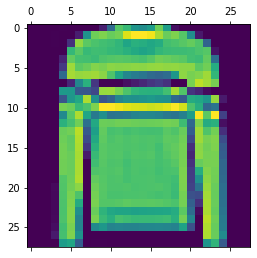

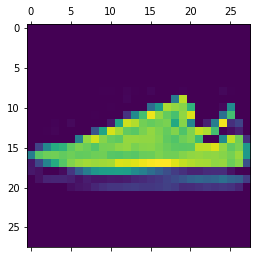

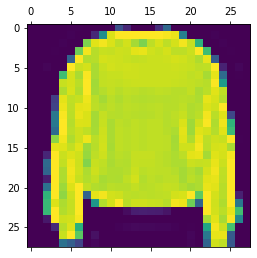

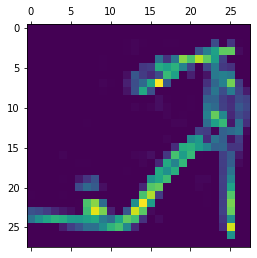

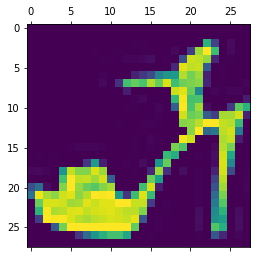

In [ ]:
for i in range(0,10):
    plt.matshow(X_train[i])


In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
labels_set=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
n=int(input("Enter the value of n:"))
print("Value of n:",n)

Enter the value of n:1
Value of n: 1


In [ ]:
X_train=X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test=X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train_old=X_train.reshape(60000,28,28)
X_test_old=X_test.reshape(10000,28,28)


In [ ]:
X_train=X_train/255.0
X_test=X_test/255.0
num_classes=10

In [ ]:
#y_train=tf.keras.utils.to_categorical(y_train, 10)
#y_test=tf.keras.utils.to_categorical(y_test, 10)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,Input

In [ ]:
model=Sequential()

In [ ]:
model.add(Conv2D(32,(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32,(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128,(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(50,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(5,activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(21,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10, activation='softmax'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         36992     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 128)               0

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer="adam",
              metrics=["accuracy"])

In [ ]:
model.fit(X_train,y_train,
          epochs=10,
          validation_data=(X_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 55s 29ms/step - loss: 1.2896 - accuracy: 0.5013 - val_loss: 0.6151 - val_accuracy: 0.7688
Epoch 2/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.5793 - accuracy: 0.7825 - val_loss: 0.5228 - val_accuracy: 0.8060
Epoch 3/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.4901 - accuracy: 0.8137 - val_loss: 0.5262 - val_accuracy: 0.8092
Epoch 4/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.4336 - accuracy: 0.8361 - val_loss: 0.4508 - val_accuracy: 0.8436
Epoch 5/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.3796 - accuracy: 0.8644 - val_loss: 0.4327 - val_accuracy: 0.8516
Epoch 6/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.3448 - accuracy: 0.8750 - val_loss: 0.3718 - val_accuracy: 0.8646
Epoch 7/10
1875/1875 [==============================] - 57s 31ms/step - loss: 0.3063 - accuracy: 0.8864 - val_loss: 0.3925 -

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
#for i in range(0,10):
 #   n=int(input("Enter the value of n:"))
  #  print("Enter the number of the cloth:",n)
   # plt.imshow(X_test_old[n])
   # plt.show()
   # print("Prediction:",labels_set[np.argmax(y_pred[n])])
   # print("Correct!!!!")
  

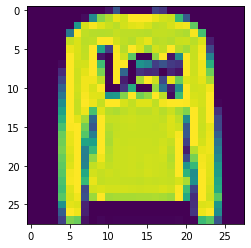

In [ ]:
plt.imshow(X_test_old[1])
plt.show()

In [ ]:
y_pred[1]

array([1.6865302e-04, 6.7265665e-13, 9.9785537e-01, 6.5972257e-05,
       2.4024713e-04, 1.6997795e-09, 1.6541235e-03, 1.3566162e-15,
       1.5530548e-05, 1.6260053e-16], dtype=float32)

In [ ]:
print("Prediction:",labels_set[np.argmax(y_pred[1])])


Prediction: Pullover


In [ ]:
accuracy=model.evaluate(X_test,y_test,verbose=7)
print("Accuracy",accuracy)

Accuracy [0.3419654667377472, 0.8833000063896179]


In [ ]:
model.save("mnist_gradio.h5")

In [ ]:
import gradio as gr


In [ ]:
from keras.models import load_model
model_new=tf.keras.models.load_model("mnist_gradio.h5")

In [ ]:
import requests
response = requests.get("https://git.io/JOW9I")
labels = response.text.split("\n")


In [ ]:
labels[9]

'Ankle boot'

In [ ]:
def image_classifier(inp):
  inp = inp.reshape((-1,28,28,1))
  prediction = model_new.predict(inp).flatten()
  return {labels[i]: float(prediction[i]) for i in range(10)}

image = gr.inputs.Image(shape=(28,28))
label = gr.outputs.Label(num_top_classes=3)

gr.Interface(fn=image_classifier, inputs="sketchpad",live=True, outputs=label,capture_session=True).launch(debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
This share link will expire in 24 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted (NEW!)
Running on External URL: https://54202.gradio.app
Interface loading below...
